# Linear Regression 

> Team Name: *S Legends*
> 
> Team Members: Myles, Tani, Arjan, Archie 

## Train-Test Split

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
df = pd.read_csv('Life Expectancy Data.csv')

df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [6]:
feature_cols = list(df.columns)
feature_cols.remove('Life_expectancy')

In [7]:
X = df[feature_cols]
y = df['Life_expectancy']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature Engineering

In [10]:
X_train.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
2026,Sri Lanka,Asia,2014,7.9,9.3,111.2825,2.45,99,99,22.9,99,99,0.01,3694,20.78,15.2,15.0,10.9,0,1
651,Czechia,European Union,2004,3.7,4.6,114.2985,13.42,98,98,26.6,96,98,0.08,14070,10.20,2.1,2.2,11.6,1,0
2225,"Venezuela, RB",South America,2014,15.4,18.0,143.0785,6.60,78,83,26.6,79,78,0.40,16056,30.04,1.6,1.5,10.0,0,1
2357,Albania,Rest of Europe,2010,11.8,13.3,80.9365,4.88,99,98,26.1,99,99,0.03,3577,2.91,1.4,1.5,9.3,0,1
670,Namibia,Africa,2003,43.3,74.4,495.7265,2.29,83,64,23.2,82,79,9.74,3298,1.88,14.2,14.3,5.8,0,1


### Feature Enrichment (Combining Country with every Feature)

**Can we make a model for each country and then have the User pick their country's model?**

In [13]:
# train = pd.concat([X_train, y_train], axis=1)

# Decomposing the training data


def data_decomposition(X_data):
    # Unique Country names in data

    countries = X_data.Country.unique()
    
    dataframes = {}
    for country in countries:
        dataframes[country] = pd.DataFrame(data = X_data[X_data['Country']==country])
    return dataframes

### Scaling

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [16]:
# Robust Scaler - Ignores Outliers

# Features for Robust Scaling:

rcolumns = list(X_train.columns) # Get all columns from dataframe
rcolumns.remove('Country')
rcolumns.remove('Region')
rcolumns.remove('Year')
rcolumns.remove('Economy_status_Developed')
rcolumns.remove('Economy_status_Developing')
rcolumns.remove('Schooling')

def rscaling(df):
    df = df.copy()
    for cols in rcolumns:
        r = RobustScaler()
        r.fit(df[[cols]])
        df[cols] = r.transform(df[[cols]])
    return df

In [17]:
X_train_scale = X_train.copy()

mm = MinMaxScaler()
mm.fit(X_train_scale[['Year']])
X_train_scale['Year'] = mm.transform(X_train_scale[['Year']])
X_train_scale.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
2026,Sri Lanka,Asia,0.933333,7.9,9.3,111.2825,2.45,99,99,22.9,99,99,0.01,3694,20.78,15.2,15.0,10.9,0,1
651,Czechia,European Union,0.266667,3.7,4.6,114.2985,13.42,98,98,26.6,96,98,0.08,14070,10.20,2.1,2.2,11.6,1,0
2225,"Venezuela, RB",South America,0.933333,15.4,18.0,143.0785,6.60,78,83,26.6,79,78,0.40,16056,30.04,1.6,1.5,10.0,0,1
2357,Albania,Rest of Europe,0.666667,11.8,13.3,80.9365,4.88,99,98,26.1,99,99,0.03,3577,2.91,1.4,1.5,9.3,0,1
670,Namibia,Africa,0.200000,43.3,74.4,495.7265,2.29,83,64,23.2,82,79,9.74,3298,1.88,14.2,14.3,5.8,0,1


In [18]:
# Min-Max Scaler - Preserves distribution

# Features for Min_Max Scaler:

mmcolumns = ['Year']

def mmscaling(df):
    df = df.copy()
    for cols in mmcolumns:
        mm = MinMaxScaler()
        mm.fit(df[[cols]])
        df[cols]= mm.transform(df[[cols]])
    return df

In [19]:
# Standard Scaler - Good for normally distributed data

# Features for Standard Scaler:

zcolumns = ['Schooling']

def zscaling(df):
    df = df.copy()
    for cols in zcolumns:  
        z = StandardScaler() 
        z.fit(df[[cols]]) 
        df[cols] = z.transform(df[[cols]])
    return df

### Feature Transformation

In [21]:
# Apply an exponential transform to features: GDP_per_capita and BMI

exp_columns = ['GDP_per_capita','BMI']
def exp(df):
    df = df.copy()
    df['exp_GDP'] = np.exp(df['GDP_per_capita'])
    df['exp_BMI'] = np.exp(df['BMI'])
    return df

### Apply Feature Engineering to all training sets

In [23]:
def feature_eng(X_data):
    dataframes = data_decomposition(X_data)
    dataframes_fe = {} 
    feature_selections = {}
    for name, df in dataframes.items():
        df = df.copy()
        df.drop(columns = ['Country','Region'], inplace = True)
        df = rscaling(df)
        df = mmscaling(df)
        df = zscaling(df)
        df = exp(df)
        df['const'] = 1 # CRUCIAL for statsmodels!!
        dataframes_fe[name] = df
    return dataframes_fe

In [24]:
X_trains_fe = feature_eng(X_train)

### Feature Selection

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the (VIF)

In [27]:
## This a piece of code from stats.stackexchange.com

## It runs the model with all the variables.
## If any of them have a higher VIF than 4, it drops the max. 
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh = 8.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    return list(X.columns[variables]) # finally, we print the variables that are still in our set
   

**Remember to exclude the constant column during the feature selection process, but to then use it when fitting the model.**

In [29]:
def feature_selection(X_trains): # Input all training sets
    selected_features = {}
    for country in X_train.Country.unique():
        #  By Variation Inflation Factor Method
        
        vif_features = calculate_vif(X_trains[country])

        # Feature Selection based on linear relationship to the target
        
        training_set = pd.concat([X_trains[country], y_train.loc[X_trains[country].index]], axis=1)
        corr_features = [col for col in training_set.columns if abs(training_set.corr()['Life_expectancy'][col]) >= 0.6]

        # Taking features that satisfy both VIF and Correlation theshold
        
        selected_features[country] = [feature for feature in corr_features if feature in vif_features]
    return selected_features # Output a dictionary with a selection of features for each country's dataframe
    

In [30]:
features = feature_selection(X_trains_fe)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'exp_GDP' at index: 10
dropping 'exp_BMI' at index: 10
dropping 'GDP_per_capita' at index: 3
dropping 'Population_mln' at index: 3
dropping 'Thinness_five_nine_years' at index: 4
dropping 'Polio' at index: 0
dropping 'Incidents_HIV' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'GDP_per_capita' at index: 5
dropping 'exp_BMI' at index: 12
dropping 'BMI' at index: 1
dropping 'Thinness_five_nine_years' at index: 6
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'exp_GDP' at index: 8
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'Population_mln' at index: 7
dropping 'GDP_per_capita' at index: 6
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'Hepatitis_B' at index: 1
dropping 'exp_BMI' at index: 10
dropping 'Schooling' at index: 6
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'GDP_per_capita' at index: 6
dropping 'exp_GDP' at index: 12
dropping 'BMI' at index: 2
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'Thinness_five_nine_years' at index: 6
dropping 'exp_BMI' at index: 9
dropping 'Population_mln' at index: 5
dropping 'Measles' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Thinness_five_nine_years' at index: 9
dropping 'Population_mln' at index: 7
dropping 'BMI' at index: 2
dropping 'exp_GDP' at index: 10
dropping 'GDP_per_capita' at index: 5
dropping 'Schooling' at index: 6
dropping 'exp_BMI' at index: 8
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'exp_GDP' at index: 14
dropping 'BMI' at index: 3


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'exp_BMI' at index: 13
dropping 'Population_mln' at index: 7
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'Diphtheria' at index: 4
dropping 'Incidents_HIV' at index: 4
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Alcohol_consumption' at index: 0
dropping 'GDP_per_capita' at index: 6
dropping 'Population_mln' at index: 6
dropping 'BMI' at index: 2
dropping 'Schooling' at index: 7
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'exp_BMI' at index: 8
dropping 'Polio' at index: 0
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'GDP_per_capita' at index: 4
dropping 'Thinness_five_nine_years' at index: 6
dropping 'Population_mln' at index: 4
dropping 'BMI' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 3
dropping 'exp_GDP' at index: 6
dropping 'Schooling' at index: 3
dropping 'Polio' at index: 0
dropping 'Incidents_HIV' at index: 1
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'exp_BMI' at index: 17
dropping 'exp_GDP' at index: 16
dropping 'BMI' at index: 5
dropping 'Under_five_deaths' at index: 0
dropping 'Population_mln' at index: 8
dropping 'Adult_mortality' at index: 0
dropping 'Polio' at index: 3
dropping 'Schooling' at index: 8
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Polio' at index: 3
dropping 'Schooling' at index: 9
dropping 'BMI' at index: 2
dropping 'Population_mln' at index: 5
dropping 'exp_GDP' at index: 9
dropping 'Incidents_HIV' at index: 3
dropping 'exp_BMI' at index: 8
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'Incidents_HIV' at index: 3
dropping 'BMI' at index: 0
dropping 'Thinness_five_nine_years' at index: 5
dropping 'GDP_per_capita' at index: 2
dropping 'Population_mln' at index: 2
dropping 'Polio' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'Population_mln' at index: 7
dropping 'exp_GDP' at index: 12
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'Thinness_five_nine_years' at index: 7
dropping 'exp_BMI' at index: 10
dropping 'GDP_per_capita' at index: 6
dropping 'Schooling' at index: 6
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'BMI' at index: 2
dropping 'Polio' at index: 2
dropping 'exp_GDP' at index: 11
dropping 'exp_BMI' at index: 11
dropping 'GDP_per_capita' at index: 4
dropping 'Population_mln' at index: 4
dropping 'Thinness_five_nine_years' at index: 5
dropping 'Incidents_HIV' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'GDP_per_capita' at index: 6
dropping 'Population_mln' at index: 6
dropping 'exp_BMI' at index: 12
dropping 'exp_GDP' at index: 11
dropping 'BMI' at index: 2
dropping 'Schooling' at index: 7
dropping 'Incidents_HIV' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'BMI' at index: 2
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'GDP_per_capita' at index: 5
dropping 'exp_BMI' at index: 11
dropping 'Schooling' at index: 7
dropping 'Diphtheria' at index: 3
dropping 'exp_GDP' at index: 8
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Polio' at index: 4
dropping 'Population_mln' at index: 7
dropping 'BMI' at index: 3
dropping 'Incidents_HIV' at index: 4
dropping 'exp_BMI' at index: 11
dropping 'Hepatitis_B' at index: 1
dropping 'Measles' at index: 1
dropping 'exp_GDP' at index: 8
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Thinness_five_nine_years' at index: 10
dropping 'Population_mln' at index: 8
dropping 'Polio' at index: 4
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'Hepatitis_B' at index: 1
dropping 'BMI' at index: 2
dropping 'Incidents_HIV' at index: 3
dropping 'exp_GDP' at index: 7
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'Polio' at index: 1
dropping 'BMI' at index: 0
dropping 'GDP_per_capita' at index: 2
dropping 'Population_mln' at index: 2
dropping 'exp_GDP' at index: 7
dropping 'Schooling' at index: 4
dropping 'Incidents_HIV' at index: 1
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 9
dropping 'Population_mln' at index: 8
dropping 'BMI' at index: 3
dropping 'Schooling' at index: 8
dropping 'Incidents_HIV' at index: 5
dropping 'Polio' at index: 3
dropping 'GDP_per_capita' at index: 4
dropping 'Alcohol_consumption' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Population_mln' at index: 7
dropping 'exp_GDP' at index: 12
dropping 'BMI' at index: 2
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'GDP_per_capita' at index: 5
dropping 'exp_BMI' at index: 9
dropping 'Schooling' at index: 6
dropping 'Thinness_five_nine_years' at index: 5
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'BMI' at index: 1
dropping 'exp_BMI' at index: 12
dropping 'Population_mln' at index: 5
dropping 'Thinness_five_nine_years' at index: 6
dropping 'GDP_per_capita' at index: 4
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'exp_GDP' at index: 15
dropping 'Incidents_HIV' at index: 7
dropping 'Thinness_ten_nineteen_years' at index: 9
dropping 'Population_mln' at index: 8
dropping 'BMI' at index: 4
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Adult_mortality' at index: 0
dropping 'GDP_per_capita' at index: 5
dropping 'Schooling' at index: 5
dropping 'Diphtheria' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Population_mln' at index: 7
dropping 'exp_GDP' at index: 12
dropping 'BMI' at index: 2
dropping 'GDP_per_capita' at index: 5
dropping 'Polio' at index: 2
dropping 'Thinness_five_nine_years' at index: 5
dropping 'Incidents_HIV' at index: 3
dropping 'Schooling' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Thinness_five_nine_years' at index: 11
dropping 'Population_mln' at index: 9
dropping 'BMI' at index: 4
dropping 'Schooling' at index: 9
dropping 'exp_BMI' at index: 12
dropping 'exp_GDP' at index: 11
dropping 'Polio' at index: 4
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'Adult_mortality' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'exp_BMI' at index: 16
dropping 'GDP_per_capita' at index: 8
dropping 'Schooling' at index: 11
dropping 'BMI' at index: 4
dropping 'Adult_mortality' at index: 0
dropping 'exp_GDP' at index: 11
dropping 'Population_mln' at index: 6
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Incidents_HIV' at index: 5
dropping 'Thinness_ten_nineteen_years' at index: 5
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'BMI' at index: 2
dropping 'exp_BMI' at index: 13
dropping 'GDP_per_capita' at index: 5
dropping 'Population_mln' at index: 5
dropping 'Schooling' at index: 7
dropping 'Polio' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 11
dropping 'GDP_per_capita' at index: 9
dropping 'BMI' at index: 5
dropping 'Population_mln' at index: 8
dropping 'Thinness_five_nine_years' at index: 8
dropping 'exp_BMI' at index: 12
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Diphtheria' at index: 5
dropping 'GDP_per_capita' at index: 6
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'Schooling' at index: 8
dropping 'Population_mln' at index: 6
dropping 'BMI' at index: 3
dropping 'Thinness_five_nine_years' at index: 5
dropping 'exp_BMI' at index: 8
dropping 'Polio' at index: 3
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Incidents_HIV' at index: 5
dropping 'GDP_per_capita' at index: 5
dropping 'BMI' at index: 2
dropping 'Thinness_five_nine_years' at index: 6
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'Schooling' at index: 5
dropping 'exp_GDP' at index: 7
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'GDP_per_capita' at index: 8
dropping 'Population_mln' at index: 8
dropping 'BMI' at index: 4
dropping 'Thinness_five_nine_years' at index: 8
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'exp_BMI' at index: 11
dropping 'Incidents_HIV' at index: 6
dropping 'Adult_mortality' at index: 0
dropping 'Diphtheria' at index: 4
dropping 'Schooling' at index: 4
dropping 'Hepatitis_B' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'exp_GDP' at index: 10
dropping 'Population_mln' at index: 4
dropping 'Thinness_ten_nineteen_years' at index: 4
dropping 'Thinness_five_nine_years' at index: 4
dropping 'Schooling' at index: 4
dropping 'Incidents_HIV' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Polio' at index: 0
dropping 'Diphtheria' at index: 0
dropping 'GDP_per_capita' at index: 1
dropping 'Population_mln' at index: 1
dropping 'Thinness_five_nine_years' at index: 2
dropping 'Thinness_ten_nineteen_years' at index: 1
dropping 'Schooling' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Population_mln' at index: 8
dropping 'exp_GDP' at index: 13
dropping 'GDP_per_capita' at index: 7
dropping 'Thinness_five_nine_years' at index: 8
dropping 'BMI' at index: 3
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'Diphtheria' at index: 4
dropping 'Schooling' at index: 5
dropping 'Polio' at index: 3
dropping 'Alcohol_consumption' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Population_mln' at index: 7
dropping 'BMI' at index: 2
dropping 'GDP_per_capita' at index: 5
dropping 'Incidents_HIV' at index: 4
dropping 'Measles' at index: 1
dropping 'Thinness_ten_nineteen_years' at index: 3
dropping 'exp_GDP' at index: 7
dropping 'exp_BMI' at index: 7
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'GDP_per_capita' at index: 11
dropping 'BMI' at index: 7
dropping 'Population_mln' at index: 10
dropping 'Under_five_deaths' at index: 2
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Polio' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'BMI' at index: 1
dropping 'Schooling' at index: 8
dropping 'GDP_per_capita' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Hepatitis_B' at index: 2
dropping 'Polio' at index: 4
dropping 'GDP_per_capita' at index: 6
dropping 'Population_mln' at index: 6
dropping 'BMI' at index: 3
dropping 'Schooling' at index: 7
dropping 'Adult_mortality' at index: 0
dropping 'exp_GDP' at index: 8
dropping 'Thinness_ten_nineteen_years' at index: 4
dropping 'Thinness_five_nine_years' at index: 4
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 9
dropping 'Polio' at index: 4
dropping 'BMI' at index: 3
dropping 'exp_BMI' at index: 12
dropping 'Population_mln' at index: 6
dropping 'Diphtheria' at index: 3
dropping 'Schooling' at index: 6
dropping 'Incidents_HIV' at index: 3
dropping 'GDP_per_capita' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'exp_BMI' at index: 13
dropping 'BMI' at index: 1
dropping 'Schooling' at index: 8
dropping 'exp_GDP' at index: 10
dropping 'GDP_per_capita' at index: 4
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'Population_mln' at index: 7
dropping 'Incidents_HIV' at index: 5
dropping 'exp_GDP' at index: 11
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'Thinness_five_nine_years' at index: 6
dropping 'Hepatitis_B' at index: 1
dropping 'GDP_per_capita' at index: 4
dropping 'Schooling' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'GDP_per_capita' at index: 7
dropping 'BMI' at index: 3
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Schooling' at index: 7
dropping 'exp_BMI' at index: 10
dropping 'Population_mln' at index: 6
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 10
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'exp_BMI' at index: 13
dropping 'Hepatitis_B' at index: 1
dropping 'GDP_per_capita' at index: 5
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'Thinness_five_nine_years' at index: 9
dropping 'Population_mln' at index: 7
dropping 'Schooling' at index: 8
dropping 'Polio' at index: 3
dropping 'exp_BMI' at index: 10
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'GDP_per_capita' at index: 7
dropping 'exp_BMI' at index: 14
dropping 'Population_mln' at index: 7
dropping 'BMI' at index: 3
dropping 'Schooling' at index: 8
dropping 'Thinness_five_nine_years' at index: 7
dropping 'exp_GDP' at index: 9
dropping 'Polio' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'GDP_per_capita' at index: 8
dropping 'exp_BMI' at index: 15
dropping 'Thinness_ten_nineteen_years' at index: 9
dropping 'BMI' at index: 4
dropping 'Schooling' at index: 9
dropping 'Thinness_five_nine_years' at index: 8
dropping 'Population_mln' at index: 7
dropping 'Hepatitis_B' at index: 2
dropping 'exp_GDP' at index: 8
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Polio' at index: 0
dropping 'Diphtheria' at index: 0
dropping 'exp_BMI' at index: 9
dropping 'Incidents_HIV' at index: 0
dropping 'Thinness_five_nine_years' at index: 3
dropping 'GDP_per_capita' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Polio' at index: 0
dropping 'Diphtheria' at index: 0
dropping 'exp_GDP' at index: 8
dropping 'Schooling' at index: 5
dropping 'GDP_per_capita' at index: 1
dropping 'Thinness_five_nine_years' at index: 3
dropping 'Population_mln' at index: 1
dropping 'Incidents_HIV' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Polio' at index: 5
dropping 'BMI' at index: 4
dropping 'Population_mln' at index: 7
dropping 'Adult_mortality' at index: 0
dropping 'Hepatitis_B' at index: 1
dropping 'exp_GDP' at index: 10
dropping 'exp_BMI' at index: 10
dropping 'GDP_per_capita' at index: 4
dropping 'Thinness_ten_nineteen_years' at index: 4
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Population_mln' at index: 4
dropping 'Incidents_HIV' at index: 2
dropping 'Schooling' at index: 5
dropping 'Diphtheria' at index: 1
dropping 'GDP_per_capita' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'GDP_per_capita' at index: 6
dropping 'BMI' at index: 2
dropping 'Population_mln' at index: 5
dropping 'exp_BMI' at index: 11
dropping 'exp_GDP' at index: 10
dropping 'Polio' at index: 2
dropping 'Schooling' at index: 6
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Polio' at index: 6
dropping 'Population_mln' at index: 9
dropping 'BMI' at index: 5
dropping 'Under_five_deaths' at index: 0
dropping 'GDP_per_capita' at index: 6
dropping 'exp_BMI' at index: 12
dropping 'Diphtheria' at index: 4
dropping 'Thinness_ten_nineteen_years' at index: 5
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'Population_mln' at index: 7
dropping 'GDP_per_capita' at index: 6
dropping 'exp_BMI' at index: 12
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Schooling' at index: 7
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'Diphtheria' at index: 4
dropping 'Incidents_HIV' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Schooling' at index: 10
dropping 'Population_mln' at index: 7
dropping 'BMI' at index: 2
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'Thinness_five_nine_years' at index: 6
dropping 'Diphtheria' at index: 3
dropping 'Polio' at index: 2
dropping 'exp_BMI' at index: 7
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'BMI' at index: 1
dropping 'Schooling' at index: 8
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Population_mln' at index: 5
dropping 'exp_BMI' at index: 9
dropping 'GDP_per_capita' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'GDP_per_capita' at index: 6
dropping 'Thinness_five_nine_years' at index: 8
dropping 'Schooling' at index: 8
dropping 'exp_BMI' at index: 11
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'Population_mln' at index: 7
dropping 'GDP_per_capita' at index: 6
dropping 'exp_BMI' at index: 12
dropping 'Diphtheria' at index: 4
dropping 'Schooling' at index: 7
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'BMI' at index: 2
dropping 'Incidents_HIV' at index: 4
dropping 'Population_mln' at index: 5
dropping 'Hepatitis_B' at index: 0
dropping 'GDP_per_capita' at index: 3
dropping 'exp_BMI' at index: 9
dropping 'Schooling' at index: 5
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Polio' at index: 0
dropping 'exp_GDP' at index: 9
dropping 'exp_BMI' at index: 9
dropping 'Diphtheria' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Polio' at index: 0
dropping 'Diphtheria' at index: 0
dropping 'Thinness_five_nine_years' at index: 4
dropping 'exp_GDP' at index: 7
dropping 'GDP_per_capita' at index: 1
dropping 'exp_BMI' at index: 6
dropping 'Population_mln' at index: 1
dropping 'Schooling' at index: 2
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Polio' at index: 7
dropping 'Under_five_deaths' at index: 1
dropping 'exp_BMI' at index: 16
dropping 'Population_mln' at index: 9
dropping 'Infant_deaths' at index: 0
dropping 'GDP_per_capita' at index: 7
dropping 'BMI' at index: 4
dropping 'Adult_mortality' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'Thinness_five_nine_years' at index: 5
Remaining variables:
dropping 'Polio' at index: 8
dropping 'exp_BMI' at index: 18


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Under_five_deaths' at index: 2
dropping 'BMI' at index: 6
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Population_mln' at index: 7
dropping 'GDP_per_capita' at index: 6
dropping 'Adult_mortality' at index: 0
dropping 'Diphtheria' at index: 3
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'Population_mln' at index: 5
dropping 'BMI' at index: 0
dropping 'GDP_per_capita' at index: 3
dropping 'exp_BMI' at index: 9
dropping 'Schooling' at index: 5
dropping 'Thinness_five_nine_years' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Population_mln' at index: 12
dropping 'Under_five_deaths' at index: 2
dropping 'Year' at index: 0
dropping 'GDP_per_capita' at index: 9
dropping 'BMI' at index: 5
dropping 'Adult_mortality' at index: 1
dropping 'Thinness_five_nine_years' at index: 8
dropping 'exp_BMI' at index: 12
dropping 'Infant_deaths' at index: 0
dropping 'Polio' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'exp_BMI' at index: 14
dropping 'Thinness_ten_nineteen_years' at index: 8
dropping 'Diphtheria' at index: 4
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Alcohol_consumption' at index: 0
dropping 'exp_GDP' at index: 9
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Incidents_HIV' at index: 4
dropping 'Polio' at index: 2
dropping 'Thinness_five_nine_years' at index: 6
dropping 'BMI' at index: 1
dropping 'GDP_per_capita' at index: 2
dropping 'Thinness_ten_nineteen_years' at index: 3
dropping 'Population_mln' at index: 2
dropping 'exp_BMI' at index: 6
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Schooling' at index: 10
dropping 'Thinness_five_nine_years' at index: 9
dropping 'BMI' at index: 2
dropping 'GDP_per_capita' at index: 5
dropping 'Polio' at index: 2
dropping 'Population_mln' at index: 4
dropping 'exp_BMI' at index: 8
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Thinness_five_nine_years' at index: 10
dropping 'Population_mln' at index: 8
dropping 'Polio' at index: 4
dropping 'Incidents_HIV' at index: 5
dropping 'BMI' at index: 3
dropping 'Schooling' at index: 6
dropping 'GDP_per_capita' at index: 4
dropping 'Thinness_ten_nineteen_years' at index: 4
dropping 'Diphtheria' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'GDP_per_capita' at index: 7
dropping 'BMI' at index: 3
dropping 'exp_GDP' at index: 12
dropping 'Incidents_HIV' at index: 5
dropping 'Schooling' at index: 8
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Population_mln' at index: 5
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'GDP_per_capita' at index: 4
dropping 'exp_BMI' at index: 11
dropping 'exp_GDP' at index: 10
dropping 'BMI' at index: 0
dropping 'Polio' at index: 0
dropping 'Population_mln' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Population_mln' at index: 8
dropping 'GDP_per_capita' at index: 7
dropping 'Schooling' at index: 9
dropping 'BMI' at index: 3
dropping 'Incidents_HIV' at index: 5
dropping 'Hepatitis_B' at index: 1
dropping 'Alcohol_consumption' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'Schooling' at index: 8
dropping 'exp_BMI' at index: 11
dropping 'Population_mln' at index: 5
dropping 'exp_GDP' at index: 9
dropping 'Thinness_ten_nineteen_years' at index: 5
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Population_mln' at index: 7
dropping 'GDP_per_capita' at index: 6
dropping 'Incidents_HIV' at index: 5
dropping 'Polio' at index: 3
dropping 'exp_BMI' at index: 10
dropping 'Schooling' at index: 6
dropping 'Diphtheria' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'exp_BMI' at index: 12
dropping 'Population_mln' at index: 6
dropping 'GDP_per_capita' at index: 5
dropping 'Diphtheria' at index: 3
dropping 'BMI' at index: 1
dropping 'Schooling' at index: 4
dropping 'exp_GDP' at index: 6
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'GDP_per_capita' at index: 5
dropping 'BMI' at index: 1
dropping 'exp_GDP' at index: 10
dropping 'Thinness_five_nine_years' at index: 6
dropping 'exp_BMI' at index: 9
dropping 'Thinness_ten_nineteen_years' at index: 5
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Adult_mortality' at index: 1
dropping 'BMI' at index: 4
dropping 'exp_BMI' at index: 15
dropping 'Under_five_deaths' at index: 0
dropping 'Schooling' at index: 10
dropping 'exp_GDP' at index: 12
dropping 'Diphtheria' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Thinness_five_nine_years' at index: 8
dropping 'GDP_per_capita' at index: 5
dropping 'BMI' at index: 1
dropping 'exp_GDP' at index: 9
dropping 'exp_BMI' at index: 9
dropping 'Incidents_HIV' at index: 3
dropping 'Diphtheria' at index: 2
dropping 'Schooling' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Thinness_five_nine_years' at index: 6
dropping 'Schooling' at index: 6
dropping 'GDP_per_capita' at index: 3
dropping 'Thinness_ten_nineteen_years' at index: 4
dropping 'Diphtheria' at index: 1
dropping 'Population_mln' at index: 2
dropping 'exp_GDP' at index: 4
dropping 'Incidents_HIV' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 11
dropping 'BMI' at index: 5
dropping 'Population_mln' at index: 9
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'exp_GDP' at index: 11
dropping 'exp_BMI' at index: 11
dropping 'Incidents_HIV' at index: 5
dropping 'GDP_per_capita' at index: 5
dropping 'Diphtheria' at index: 4
dropping 'Alcohol_consumption' at index: 0
dropping 'Polio' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Population_mln' at index: 4
dropping 'GDP_per_capita' at index: 3
dropping 'exp_BMI' at index: 9
dropping 'Schooling' at index: 5
dropping 'Polio' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'GDP_per_capita' at index: 8
dropping 'Schooling' at index: 11
dropping 'Population_mln' at index: 8
dropping 'Hepatitis_B' at index: 2
dropping 'BMI' at index: 3
dropping 'Adult_mortality' at index: 0
dropping 'exp_GDP' at index: 9
dropping 'exp_BMI' at index: 9
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'BMI' at index: 2
dropping 'Thinness_five_nine_years' at index: 8
dropping 'exp_GDP' at index: 11
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'exp_BMI' at index: 10
dropping 'Population_mln' at index: 6
dropping 'Polio' at index: 2
dropping 'GDP_per_capita' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Population_mln' at index: 7
dropping 'GDP_per_capita' at index: 6
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'exp_BMI' at index: 11
dropping 'Incidents_HIV' at index: 5
dropping 'BMI' at index: 2
dropping 'exp_GDP' at index: 8
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'Schooling' at index: 8
dropping 'BMI' at index: 0
dropping 'Population_mln' at index: 4
dropping 'Incidents_HIV' at index: 2
dropping 'exp_GDP' at index: 7
dropping 'exp_BMI' at index: 7
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'exp_BMI' at index: 14
dropping 'exp_GDP' at index: 13
dropping 'Population_mln' at index: 7
dropping 'BMI' at index: 2
dropping 'Diphtheria' at index: 3
dropping 'GDP_per_capita' at index: 4
dropping 'Measles' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Population_mln' at index: 8
dropping 'BMI' at index: 3
dropping 'Schooling' at index: 9
dropping 'GDP_per_capita' at index: 6
dropping 'Incidents_HIV' at index: 5
dropping 'Diphtheria' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Population_mln' at index: 8
dropping 'Thinness_ten_nineteen_years' at index: 8
dropping 'GDP_per_capita' at index: 7
dropping 'exp_BMI' at index: 12
dropping 'Polio' at index: 4
dropping 'Hepatitis_B' at index: 1
dropping 'BMI' at index: 2
dropping 'Schooling' at index: 5
dropping 'Diphtheria' at index: 2
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Polio' at index: 5
dropping 'BMI' at index: 4
dropping 'Schooling' at index: 10
dropping 'Population_mln' at index: 7
dropping 'GDP_per_capita' at index: 6
dropping 'Incidents_HIV' at index: 5
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Population_mln' at index: 6
dropping 'BMI' at index: 1
dropping 'GDP_per_capita' at index: 4
dropping 'exp_BMI' at index: 10
dropping 'Polio' at index: 1
dropping 'Schooling' at index: 5
dropping 'Thinness_five_nine_years' at index: 4
dropping 'Measles' at index: 0
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Population_mln' at index: 8
dropping 'exp_BMI' at index: 14
dropping 'GDP_per_capita' at index: 7
dropping 'BMI' at index: 3
dropping 'Diphtheria' at index: 4
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Hepatitis_B' at index: 1
dropping 'BMI' at index: 2
dropping 'Schooling' at index: 9
dropping 'GDP_per_capita' at index: 5
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Measles' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Polio' at index: 0
dropping 'Diphtheria' at index: 0
dropping 'exp_GDP' at index: 8
dropping 'Thinness_ten_nineteen_years' at index: 3
dropping 'Population_mln' at index: 2
dropping 'Thinness_five_nine_years' at index: 2
dropping 'GDP_per_capita' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'exp_BMI' at index: 11
dropping 'Population_mln' at index: 4
dropping 'GDP_per_capita' at index: 3
dropping 'Polio' at index: 0
dropping 'Schooling' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Polio' at index: 0
dropping 'Thinness_five_nine_years' at index: 5
dropping 'Population_mln' at index: 3
dropping 'Schooling' at index: 4
dropping 'GDP_per_capita' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 8
dropping 'BMI' at index: 2
dropping 'Population_mln' at index: 6
dropping 'GDP_per_capita' at index: 5
dropping 'Thinness_five_nine_years' at index: 5
dropping 'Polio' at index: 2
dropping 'exp_BMI' at index: 8
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'exp_BMI' at index: 16
dropping 'Adult_mortality' at index: 0
dropping 'Thinness_five_nine_years' at index: 10
dropping 'BMI' at index: 3
dropping 'Thinness_ten_nineteen_years' at index: 8
dropping 'GDP_per_capita' at index: 6
dropping 'Diphtheria' at index: 4
dropping 'Schooling' at index: 6
dropping 'Population_mln' at index: 5
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Thinness_five_nine_years' at index: 12
dropping 'Under_five_deaths' at index: 0
dropping 'BMI' at index: 4
dropping 'Population_mln' at index: 8
dropping 'Incidents_HIV' at index: 6
dropping 'Schooling' at index: 8
dropping 'Adult_mortality' at index: 0
dropping 'exp_GDP' at index: 9
dropping 'exp_BMI' at index: 9
dropping 'Polio' at index: 3
dropping 'GDP_per_capita' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Polio' at index: 0
dropping 'exp_GDP' at index: 9
dropping 'Population_mln' at index: 3
dropping 'Incidents_HIV' at index: 1
dropping 'GDP_per_capita' at index: 1
dropping 'Schooling' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Population_mln' at index: 9
dropping 'Schooling' at index: 11
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'GDP_per_capita' at index: 6
dropping 'exp_BMI' at index: 11
dropping 'Incidents_HIV' at index: 5
dropping 'Polio' at index: 3
dropping 'Alcohol_consumption' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'BMI' at index: 2
dropping 'Incidents_HIV' at index: 4
dropping 'Population_mln' at index: 5
dropping 'GDP_per_capita' at index: 4
dropping 'exp_BMI' at index: 10
dropping 'exp_GDP' at index: 9
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'GDP_per_capita' at index: 9
dropping 'Population_mln' at index: 9
dropping 'BMI' at index: 5
dropping 'exp_GDP' at index: 13
dropping 'Under_five_deaths' at index: 0
dropping 'exp_BMI' at index: 12
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'Adult_mortality' at index: 0
dropping 'Thinness_five_nine_years' at index: 6
dropping 'Alcohol_consumption' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'Population_mln' at index: 5
dropping 'GDP_per_capita' at index: 4
dropping 'Thinness_five_nine_years' at index: 5
dropping 'Schooling' at index: 5
dropping 'BMI' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 3
dropping 'exp_BMI' at index: 6
dropping 'Polio' at index: 0
dropping 'Diphtheria' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'GDP_per_capita' at index: 5
dropping 'BMI' at index: 1
dropping 'Population_mln' at index: 4
dropping 'Incidents_HIV' at index: 3
dropping 'Thinness_five_nine_years' at index: 4
dropping 'exp_GDP' at index: 7
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Population_mln' at index: 4
dropping 'exp_GDP' at index: 9
dropping 'GDP_per_capita' at index: 3
dropping 'exp_BMI' at index: 8
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Polio' at index: 0
dropping 'exp_GDP' at index: 9
dropping 'Population_mln' at index: 3
dropping 'GDP_per_capita' at index: 2
dropping 'Incidents_HIV' at index: 1
dropping 'Thinness_five_nine_years' at index: 2
dropping 'exp_BMI' at index: 5
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'GDP_per_capita' at index: 6
dropping 'Incidents_HIV' at index: 5
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Population_mln' at index: 5
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'BMI' at index: 2
dropping 'Schooling' at index: 4
dropping 'exp_BMI' at index: 7
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Polio' at index: 5
dropping 'Schooling' at index: 11
dropping 'BMI' at index: 4
dropping 'Thinness_five_nine_years' at index: 9
dropping 'Hepatitis_B' at index: 2
dropping 'exp_GDP' at index: 10
dropping 'Adult_mortality' at index: 0
dropping 'exp_BMI' at index: 9
dropping 'GDP_per_capita' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'BMI' at index: 2
dropping 'exp_BMI' at index: 13
dropping 'GDP_per_capita' at index: 5
dropping 'Population_mln' at index: 5
dropping 'Polio' at index: 2
dropping 'exp_GDP' at index: 9
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'exp_BMI' at index: 14
dropping 'BMI' at index: 2
dropping 'Population_mln' at index: 6
dropping 'exp_GDP' at index: 11
dropping 'Diphtheria' at index: 3
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'Schooling' at index: 6
dropping 'GDP_per_capita' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'BMI' at index: 2
dropping 'GDP_per_capita' at index: 5
dropping 'Population_mln' at index: 5
dropping 'Schooling' at index: 7
dropping 'Incidents_HIV' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'BMI' at index: 3
dropping 'Population_mln' at index: 7
dropping 'Polio' at index: 3
dropping 'GDP_per_capita' at index: 5
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'Alcohol_consumption' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Population_mln' at index: 7
dropping 'BMI' at index: 2
dropping 'exp_BMI' at index: 12
dropping 'Diphtheria' at index: 3
dropping 'GDP_per_capita' at index: 4
dropping 'Schooling' at index: 6
dropping 'Thinness_ten_nineteen_years' at index: 4
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'exp_BMI' at index: 15
dropping 'Polio' at index: 4
dropping 'GDP_per_capita' at index: 6
dropping 'Measles' at index: 2
dropping 'Schooling' at index: 8
dropping 'Population_mln' at index: 5
dropping 'Thinness_five_nine_years' at index: 6
dropping 'BMI' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Thinness_five_nine_years' at index: 9
dropping 'BMI' at index: 2
dropping 'exp_BMI' at index: 12
dropping 'exp_GDP' at index: 11
dropping 'Population_mln' at index: 6
dropping 'Schooling' at index: 7
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'Diphtheria' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'BMI' at index: 1
dropping 'Incidents_HIV' at index: 3
dropping 'GDP_per_capita' at index: 3
dropping 'Thinness_ten_nineteen_years' at index: 4
dropping 'Population_mln' at index: 3
dropping 'exp_BMI' at index: 8
dropping 'Polio' at index: 1
dropping 'Thinness_five_nine_years' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Polio' at index: 6
dropping 'Under_five_deaths' at index: 0
dropping 'Schooling' at index: 11
dropping 'Adult_mortality' at index: 0
dropping 'GDP_per_capita' at index: 6
dropping 'Population_mln' at index: 6
dropping 'BMI' at index: 3
dropping 'Measles' at index: 2
dropping 'Alcohol_consumption' at index: 0
dropping 'exp_BMI' at index: 8
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Population_mln' at index: 8
dropping 'exp_BMI' at index: 14
dropping 'exp_GDP' at index: 13
dropping 'Schooling' at index: 10
dropping 'Thinness_ten_nineteen_years' at index: 8
dropping 'BMI' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'GDP_per_capita' at index: 5
dropping 'exp_GDP' at index: 10
dropping 'BMI' at index: 1
dropping 'Thinness_five_nine_years' at index: 5
dropping 'Diphtheria' at index: 2
dropping 'Schooling' at index: 4
dropping 'exp_BMI' at index: 6
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'exp_BMI' at index: 12
dropping 'BMI' at index: 0
dropping 'GDP_per_capita' at index: 3
dropping 'Population_mln' at index: 3
dropping 'Polio' at index: 0
dropping 'exp_GDP' at index: 7
dropping 'Thinness_ten_nineteen_years' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'Polio' at index: 0
dropping 'GDP_per_capita' at index: 2
dropping 'Population_mln' at index: 2
dropping 'Schooling' at index: 3
dropping 'Diphtheria' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Population_mln' at index: 8
dropping 'BMI' at index: 3
dropping 'exp_BMI' at index: 13
dropping 'GDP_per_capita' at index: 6
dropping 'Schooling' at index: 8
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Alcohol_consumption' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'exp_BMI' at index: 15
dropping 'exp_GDP' at index: 14
dropping 'Population_mln' at index: 8
dropping 'GDP_per_capita' at index: 7
dropping 'Incidents_HIV' at index: 6
dropping 'BMI' at index: 3
dropping 'Diphtheria' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Hepatitis_B' at index: 1
dropping 'Incidents_HIV' at index: 5
dropping 'BMI' at index: 2
dropping 'GDP_per_capita' at index: 4
dropping 'exp_GDP' at index: 10
dropping 'exp_BMI' at index: 10
dropping 'Thinness_five_nine_years' at index: 6
dropping 'Diphtheria' at index: 3
dropping 'Thinness_ten_nineteen_years' at index: 4
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'BMI' at index: 4
dropping 'Adult_mortality' at index: 0
dropping 'GDP_per_capita' at index: 6
dropping 'Schooling' at index: 9
dropping 'Population_mln' at index: 6
dropping 'Alcohol_consumption' at index: 0
dropping 'Diphtheria' at index: 3
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'GDP_per_capita' at index: 7
dropping 'BMI' at index: 3
dropping 'exp_BMI' at index: 13
dropping 'Diphtheria' at index: 4
dropping 'Population_mln' at index: 5
dropping 'Polio' at index: 3
dropping 'Thinness_five_nine_years' at index: 5
dropping 'Schooling' at index: 5
dropping 'Thinness_ten_nineteen_years' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'BMI' at index: 0
dropping 'GDP_per_capita' at index: 3
dropping 'Population_mln' at index: 3
dropping 'exp_GDP' at index: 7
dropping 'Incidents_HIV' at index: 2
dropping 'Thinness_five_nine_years' at index: 2
dropping 'Diphtheria' at index: 1
dropping 'Schooling' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'GDP_per_capita' at index: 5
dropping 'Schooling' at index: 8
dropping 'Population_mln' at index: 5
dropping 'Diphtheria' at index: 3
dropping 'BMI' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'BMI' at index: 1
dropping 'Population_mln' at index: 5
dropping 'GDP_per_capita' at index: 4
dropping 'Thinness_ten_nineteen_years' at index: 4
dropping 'exp_GDP' at index: 8
dropping 'Thinness_five_nine_years' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'GDP_per_capita' at index: 6
dropping 'exp_BMI' at index: 13
dropping 'Population_mln' at index: 6
dropping 'Thinness_five_nine_years' at index: 7
dropping 'BMI' at index: 2
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'Incidents_HIV' at index: 4
dropping 'Schooling' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Population_mln' at index: 8
dropping 'exp_BMI' at index: 14
dropping 'GDP_per_capita' at index: 7
dropping 'Polio' at index: 4
dropping 'BMI' at index: 3
dropping 'Hepatitis_B' at index: 1
dropping 'Thinness_ten_nineteen_years' at index: 4
dropping 'Thinness_five_nine_years' at index: 4
dropping 'exp_GDP' at index: 7
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Thinness_five_nine_years' at index: 9
dropping 'Population_mln' at index: 7
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'BMI' at index: 2
dropping 'exp_GDP' at index: 9
dropping 'exp_BMI' at index: 9
dropping 'Diphtheria' at index: 3
dropping 'Schooling' at index: 5
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 11
dropping 'Population_mln' at index: 10
dropping 'Adult_mortality' at index: 1
dropping 'BMI' at index: 4
dropping 'exp_GDP' at index: 12
dropping 'GDP_per_capita' at index: 7
dropping 'Under_five_deaths' at index: 0
dropping 'Incidents_HIV' at index: 5
dropping 'exp_BMI' at index: 9
Remaining variables:
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'BMI' at index: 2
dropping 'Polio' at index: 2
dropping 'exp_BMI' at index: 12
dropping 'Hepatitis_B' at index: 0
dropping 'GDP_per_capita' at index: 3
dropping 'Population_mln' at index: 3
dropping 'Thinness_ten_nineteen_years' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'exp_BMI' at index: 11
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'Thinness_five_nine_years' at index: 5
dropping 'GDP_per_capita' at index: 3
dropping 'exp_GDP' at index: 7
dropping 'Population_mln' at index: 3
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Population_mln' at index: 9
dropping 'BMI' at index: 4
dropping 'Schooling' at index: 10
dropping 'Adult_mortality' at index: 0
dropping 'exp_BMI' at index: 12
dropping 'GDP_per_capita' at index: 6
dropping 'Incidents_HIV' at index: 5
dropping 'Thinness_five_nine_years' at index: 6
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Population_mln' at index: 4
dropping 'exp_GDP' at index: 9
dropping 'GDP_per_capita' at index: 3
dropping 'Thinness_five_nine_years' at index: 4
dropping 'Diphtheria' at index: 1
dropping 'exp_BMI' at index: 6
dropping 'Incidents_HIV' at index: 1
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'GDP_per_capita' at index: 4
dropping 'BMI' at index: 0
dropping 'Incidents_HIV' at index: 2
dropping 'Diphtheria' at index: 1
dropping 'Population_mln' at index: 1
dropping 'exp_BMI' at index: 7
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'GDP_per_capita' at index: 3
dropping 'Diphtheria' at index: 1
dropping 'exp_BMI' at index: 9
dropping 'Thinness_five_nine_years' at index: 4
dropping 'Schooling' at index: 4
dropping 'Thinness_ten_nineteen_years' at index: 3
dropping 'Population_mln' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Adult_mortality' at index: 1
dropping 'GDP_per_capita' at index: 8
dropping 'Population_mln' at index: 8
dropping 'Under_five_deaths' at index: 0
dropping 'BMI' at index: 3
dropping 'Thinness_five_nine_years' at index: 7
dropping 'Thinness_ten_nineteen_years' at index: 6
dropping 'exp_BMI' at index: 10
dropping 'Schooling' at index: 6
dropping 'exp_GDP' at index: 8
dropping 'Diphtheria' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Thinness_five_nine_years' at index: 9
dropping 'Incidents_HIV' at index: 5
dropping 'exp_BMI' at index: 12
dropping 'Population_mln' at index: 6
dropping 'exp_GDP' at index: 10
dropping 'GDP_per_capita' at index: 5
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'exp_GDP' at index: 13
dropping 'exp_BMI' at index: 13
dropping 'BMI' at index: 2
dropping 'GDP_per_capita' at index: 5
dropping 'Incidents_HIV' at index: 4
dropping 'Schooling' at index: 7
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'GDP_per_capita' at index: 7
dropping 'Polio' at index: 4
dropping 'exp_BMI' at index: 13
dropping 'Population_mln' at index: 6
dropping 'Schooling' at index: 8
dropping 'exp_GDP' at index: 10
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'BMI' at index: 0
dropping 'Schooling' at index: 7
dropping 'exp_GDP' at index: 9
dropping 'Diphtheria' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Population_mln' at index: 7
dropping 'exp_GDP' at index: 12
dropping 'Measles' at index: 1
dropping 'BMI' at index: 1
dropping 'Diphtheria' at index: 2
dropping 'GDP_per_capita' at index: 3
dropping 'Hepatitis_B' at index: 0
dropping 'Polio' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Polio' at index: 3
dropping 'BMI' at index: 2
dropping 'Schooling' at index: 8
dropping 'GDP_per_capita' at index: 4
dropping 'Hepatitis_B' at index: 0
dropping 'exp_BMI' at index: 9
dropping 'Diphtheria' at index: 1
dropping 'Incidents_HIV' at index: 1
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'BMI' at index: 2
dropping 'exp_BMI' at index: 13
dropping 'Population_mln' at index: 6
dropping 'GDP_per_capita' at index: 5
dropping 'Schooling' at index: 7
dropping 'Measles' at index: 1
dropping 'Thinness_ten_nineteen_years' at index: 4
dropping 'Thinness_five_nine_years' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Population_mln' at index: 7
dropping 'GDP_per_capita' at index: 6
dropping 'BMI' at index: 2
dropping 'exp_GDP' at index: 10
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'Thinness_five_nine_years' at index: 5
dropping 'exp_BMI' at index: 8
dropping 'Incidents_HIV' at index: 4
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Measles' at index: 0
dropping 'exp_BMI' at index: 12
dropping 'BMI' at index: 0
dropping 'Thinness_five_nine_years' at index: 6
dropping 'Thinness_ten_nineteen_years' at index: 5
dropping 'Polio' at index: 0
dropping 'GDP_per_capita' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Population_mln' at index: 7
dropping 'Diphtheria' at index: 4
dropping 'BMI' at index: 2
dropping 'Hepatitis_B' at index: 0
dropping 'exp_GDP' at index: 9
dropping 'Schooling' at index: 6
dropping 'exp_BMI' at index: 8
dropping 'Thinness_five_nine_years' at index: 5
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


dropping 'exp_GDP' at index: 18
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'GDP_per_capita' at index: 6
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'exp_BMI' at index: 11
dropping 'Incidents_HIV' at index: 5
dropping 'BMI' at index: 2
dropping 'Schooling' at index: 6
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'Thinness_ten_nineteen_years' at index: 7
dropping 'Population_mln' at index: 6
dropping 'Incidents_HIV' at index: 4
dropping 'Thinness_five_nine_years' at index: 5
dropping 'exp_BMI' at index: 9
dropping 'GDP_per_capita' at index: 4
dropping 'Diphtheria' at index: 3
dropping 'Measles' at index: 0
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
dropping 'BMI' at index: 1
dropping 'Population_mln' at index: 5
dropping 'Thinness_five_nine_years' at index: 6
dropping 'Schooling' at index: 6
dropping 'GDP_per_capita' at index: 4
dropping 'Thinness_ten_nineteen_years' at index: 4
dropping 'Diphtheria' at index: 2
Remaining variables:


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:
dropping 'Year' at index: 0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


dropping 'Infant_deaths' at index: 0
dropping 'Under_five_deaths' at index: 0
dropping 'Adult_mortality' at index: 0
dropping 'Alcohol_consumption' at index: 0
dropping 'Hepatitis_B' at index: 0
Remaining variables:


## Test on Train

### Fit the Linear Regression Models

**Re-add the Constant column for the lin reg model**

In [34]:
def final_features(features):
    final_features = {}
    for country in list(features.keys()):
        final_features[country] = features[country]
        final_features[country].insert(0,'const')
    return final_features

In [35]:
final_features = final_features(features)
final_features

{'Sri Lanka': ['const', 'Thinness_ten_nineteen_years', 'Schooling'],
 'Czechia': ['const', 'Polio', 'Population_mln', 'Schooling'],
 'Venezuela, RB': ['const', 'Polio', 'Thinness_five_nine_years'],
 'Albania': ['const',
  'Hepatitis_B',
  'Polio',
  'Diphtheria',
  'Incidents_HIV',
  'Schooling'],
 'Namibia': ['const', 'Hepatitis_B', 'Polio', 'Diphtheria', 'Incidents_HIV'],
 'Qatar': ['const',
  'Alcohol_consumption',
  'Polio',
  'GDP_per_capita',
  'Thinness_five_nine_years',
  'Schooling'],
 'United Arab Emirates': ['const', 'Diphtheria', 'exp_GDP'],
 'Thailand': ['const', 'Diphtheria', 'exp_BMI'],
 'New Zealand': ['const', 'Hepatitis_B', 'Diphtheria', 'GDP_per_capita'],
 'Cyprus': ['const', 'Hepatitis_B', 'Measles'],
 'Portugal': ['const', 'Schooling'],
 'Serbia': ['const', 'Alcohol_consumption', 'Hepatitis_B', 'Incidents_HIV'],
 'Singapore': ['const', 'Measles', 'Thinness_ten_nineteen_years', 'Schooling'],
 'Philippines': ['const', 'Hepatitis_B', 'Measles'],
 'Ethiopia': ['const',

**Fit the linear regression models for each country and collect their rmse on the training set**

In [37]:
def linreg_train_summary():
    rmse = {}
    R_squared = {}
    cond_no = {}
    
    for country in list(X_trains_fe.keys()):
        training_set2 = pd.concat([X_trains_fe[country], y_train.loc[X_trains_fe[country].index]], axis=1)
        y_train2 = training_set2['Life_expectancy']
        lin_reg = sm.OLS(y_train2, X_trains_fe[country][final_features[country]])
        results = lin_reg.fit()

        R_squared[country] = results.rsquared
        cond_no[country] = results.condition_number
       
        y_pred = results.predict(X_trains_fe[country][final_features[country]])
    
        rmse_1 = statsmodels.tools.eval_measures.rmse(y_train2, y_pred)

        rmse[country] = round(rmse_1, 3)
        
    return rmse, R_squared, cond_no
    

In [62]:
(data2, data3, data4) = linreg_train_summary()

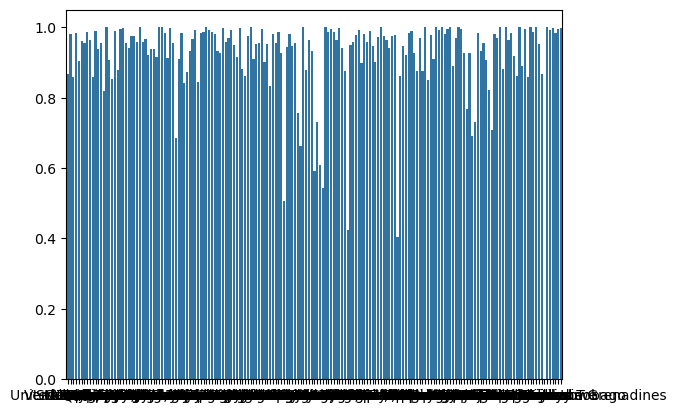

In [65]:
sns.barplot(data3)
plt.show()

## Test on Test

In [ ]:
def linreg_test_summary():

    # Feature Engineer the new_data

    
    # fit the model
    
    training_set2 = pd.concat([X_trains_fe[country], y_train.loc[X_trains_fe[country].index]], axis=1)
    y_train2 = training_set2['Life_expectancy']
    lin_reg = sm.OLS(y_train2, X_trains_fe[country][final_features[country]])
    results = lin_reg.fit()

    
    y_pred = results.predict(X_test_fe)
    
    rmse_1 = statsmodels.tools.eval_measures.rmse(y_train2, y_pred)

    return prediction

## Test on the Test Set

In [ ]:
## We apply feature_eng to the X_test set! 
## This is why having a nice neat function is very nice! 
X_test_fe = feature_eng(X_test)

## Now we predict using the X_test_fe set!
## We don't "fit" the model again! 
## We want to see test results that are similar to the training results!

In [ ]:
y_test_pred = results.predict(X_test_fe[final_features])
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)